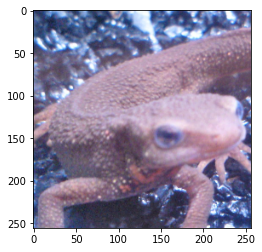

In [7]:
# ref: https://github.com/yoyoyo-yo/Gasyori100knock
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import cv2

img_orig = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_256x256.png')

plt.imshow(img_orig)
plt.show()

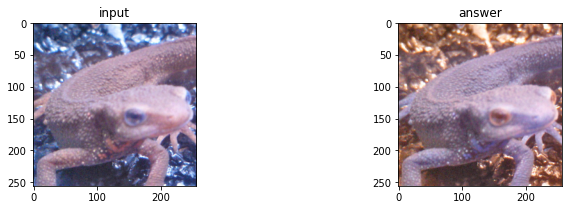

In [32]:
# Q1
img_bgr = img_orig[..., ::-1]

plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
plt.title('input')
plt.imshow(img_orig)
plt.subplot(1,2,2)
plt.title('answer')
plt.imshow(img_bgr)
plt.show()

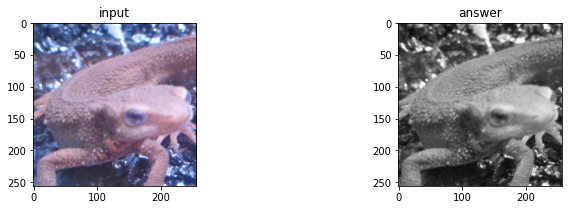

In [53]:
#Q2
'''
img_gray=cv2.cvtColor(img_orig,cv2.COLOR_RGB2GRAY)
'''

img_gray = 0.2126*img_orig[..., 0] + 0.7152*img_orig[...,1] + 0.00722*img_orig[...,2]
img_gray = np.clip(img_gray, 0, 255).astype(np.uint8)

plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
plt.title('input')
plt.imshow(img_orig)
plt.subplot(1,2,2)
plt.title('answer')
plt.imshow(img_gray, cmap='gray')
plt.show()


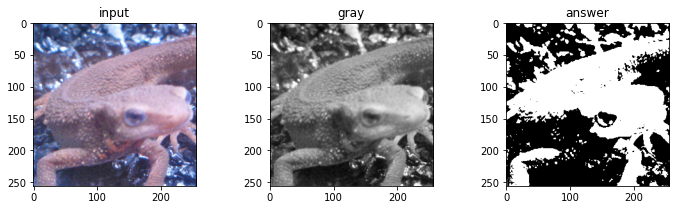

In [55]:
# Q3
img_gray = cv2.cvtColor(img_orig, cv2.COLOR_RGB2GRAY)
img_bin1 = (img_gray/128).astype(np.uint8) * 255

plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.title('input')
plt.imshow(img_orig)
plt.subplot(1, 3, 2)
plt.title('gray')
plt.imshow(img_gray, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('answer')
plt.imshow(img_bin1, cmap='gray')
plt.show()


oth= 129


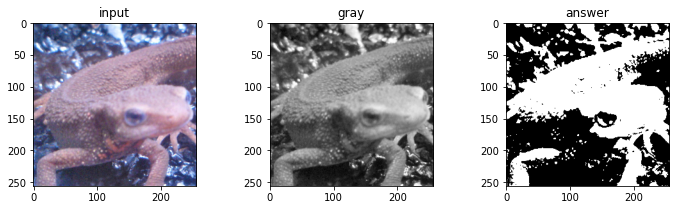

In [73]:
#Q4
def sigma_b(imgg, th):
    w0 = np.count_nonzero(imgg <= th)
    w1 = np.size(imgg) - w0
    M0 = 0 if w0 == 0 else np.sum(imgg[imgg <= th]) / w0
    M1 = 255 if w1 == 0 else np.sum(imgg[imgg > th]) / w1

    ret = (w0*w1)/((w0+w1)**2)*((M0-M1)**2)
    return ret

def otsu_thresh(imgg):
    maxb=0
    maxth=0
    for th in range(0, 256):
        b = sigma_b(imgg, th)
        if maxb<b:
            maxb=b
            maxth=th

    return maxth

oth = otsu_thresh(img_gray)
img_bin2 = (img_gray>oth).astype(np.uint8) * 255

print('oth=',oth)
plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.title('input')
plt.imshow(img_orig)
plt.subplot(1, 3, 2)
plt.title('gray')
plt.imshow(img_gray, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('answer')
plt.imshow(img_bin2, cmap='gray')
plt.show()



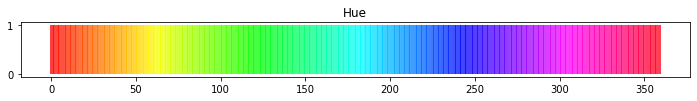

In [74]:
from matplotlib import cm
plt.figure(figsize=(12, 1))
plt.title('Hue')
for i in range(360):
    plt.vlines(i, 0, 1, color=cm.hsv(i / 360))
plt.show()

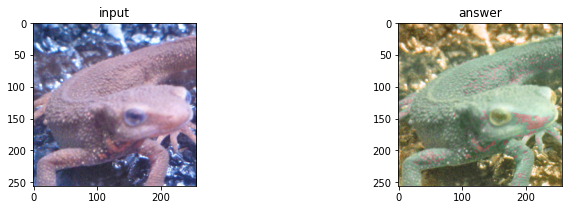

In [83]:
# Q5 (skip)
# opencv
hsv = cv2.cvtColor(img_orig, cv2.COLOR_RGB2HSV) # RGB -> HSV
hsv[..., 0] = (hsv[..., 0] + 90) % 180 # Hue of opencv is defined [0, 180]
img_hsv = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB) # HSV -> RGB
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.title('input')
plt.imshow(img_orig)
plt.subplot(1, 2, 2)
plt.title('answer')
plt.imshow(img_hsv)
plt.show()
